<a href="https://colab.research.google.com/github/oochuru/MLBooty25Ochuru/blob/main/4_DataScience_TakeHome.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement

#### Using 'transaction history' and 'grocery inventory' (imported in below code snippets), answer the questions below:


In [16]:
import json
import os
import pandas as pd
import requests
from IPython.display import display # Import display

In [30]:
# Fetch the JSON 'grocery inventory' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/grocery_inventory.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    inventory_df = pd.DataFrame(data)
    display(inventory_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,item,category,quantity,unit_cost,max_quantity
0,tomato,vegetable,1000,0.10,10
1,apple,fruit,504,0.25,5
2,orange,fruit,400,0.05,10
3,strawberry,fruit,430,0.08,15
4,onion,vegetable,254,0.20,8
5,carrot,vegetable,204,0.05,15
6,pepper,vegetable,540,0.10,15
7,eggplant,vegetable,150,0.30,5
8,broccoli,vegetable,167,2.50,2
9,beans,vegetable,135,2.00,3


In [31]:
# Fetch the JSON 'transaction history' data from the URL
url = 'https://raw.githubusercontent.com/shashankbl/mlbootcamp2025flc/main/extras/transaction_history.json'  # Use 'raw.githubusercontent.com'
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes
    data = response.json()
except requests.exceptions.RequestException as e:
    print(f"Error fetching JSON from URL: {e}")
    data = {}  # Initialize as empty dictionary in case of error

# Convert the JSON data to a Pandas DataFrame
try:
    transaction_df = pd.DataFrame(data)
    display(transaction_df) # Display the DataFrame using display() for pretty print
except (ValueError, KeyError) as e:
    print(f"Error converting JSON to DataFrame: {e}")
    if data:
        print("JSON data loaded but could not be formatted as a table")

,id,customer,date,quantities,transaction_duration
0,0001,bob,"[2025, 1, 10]","{'apple': 6, 'milk': 2, 'orange': 10}",12.5
1,0002,martha,"[2025, 1, 10]","{'strawberry': 16, 'milk': 3}",2.5
2,0003,zed,"[2025, 1, 10]","{'milk': 6, 'yogurt': 4, 'mochi': 5}",4
3,0004,frank,"[2025, 1, 10]","{'onion': 10, 'carrot': 13, 'milk': 3, 'strawb...",6.5
4,0005,bob,"[2025, 1, 10]","{'onion': 20, 'carrot': 8, 'milk': 1, 'strawbe...",12.5
5,0006,suzy,"[2025, 1, 10]","{'eggplant': 6, 'apple': 2}",10.5
6,0007,mia,"[2025, 1, 11]","{'apple': 6, 'milk': 2, 'beans': 12, 'mochi': 4}",12.5
7,0008,mick,"[2025, 1, 11]","{'cheese': 8, 'mochi': 4}",4.5
8,0009,bruce,"[2025, 1, 11]","{'apple': 8, 'milk': 1, 'eggplant': 4}",3.5
9,0010,frank,"[2025, 1, 11]","{'soda': 16, 'milk': 12}",9.5


**NOTE:**
- You are allowed to format the dataframes as you prefer.
- You are encouraged to also optimize/improve the code snippets provided.
- You can import other libraries required for the analysis and visualization.
- Write conclusions/answers for each question in a 'text cell'.

### Calculate the value of prior transactions.

In [32]:
# Write code here...
# Calculate the value of prior transactions
transaction_value = 0

# Loop through each transaction
for _, row in transaction_df.iterrows():
    quantities = row['quantities']

    # For each item in the transaction
    for item, quantity in quantities.items():
        # Find the item's unit cost in the inventory
        item_cost = 0
        for _, inv_row in inventory_df.iterrows():
            if inv_row['item'] == item:
                item_cost = inv_row['unit_cost']
                break

        # Calculate the value of this item in the transaction
        item_value = quantity * item_cost
        transaction_value += item_value

print(f"Total value of prior transactions: ${transaction_value:.2f}")

Total value of prior transactions: $487.27


### How many transactions violated the 'max quantities' rule?

In [20]:
# Write code here...
# Count transactions that violate max quantities rule
violation_count = 0

# Create a dictionary to store max quantities for easy lookup
max_quantities = {}
for _, row in inventory_df.iterrows():
    max_quantities[row['item']] = row['max_quantity']

# Check each transaction for violations
for _, transaction in transaction_df.iterrows():
    has_violation = False
    quantities = transaction['quantities']

    # Check each item in the transaction
    for item, quantity in quantities.items():
        # If item exists in inventory and quantity exceeds max
        if item in max_quantities and quantity > max_quantities[item]:
            has_violation = True
            break

    # If this transaction had any violation, count it
    if has_violation:
        violation_count += 1

print(f"Number of transactions violating max quantities rule: {violation_count}")

Number of transactions violating max quantities rule: 21


### Track the popularity of items in the grocery store by factoring the transaction quantities (histogram representation)


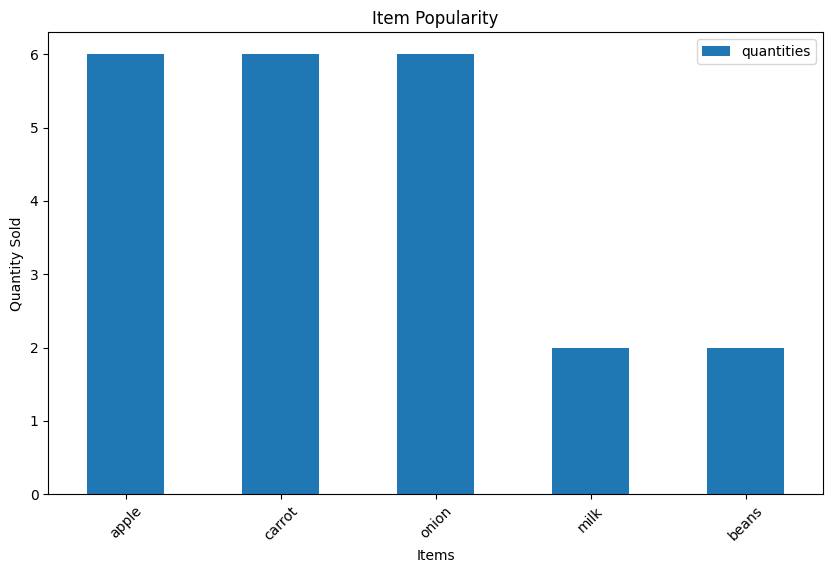

In [22]:
import matplotlib.pyplot as plt

popularity_df = pd.DataFrame({
    'items': list(quantities.keys()),
    'quantities': list(quantities.values())
})

popularity_df = popularity_df.sort_values('quantities', ascending= False)

popularity_df.plot(kind='bar', x='items', y='quantities', figsize=(10, 6))
plt.title('Item Popularity')
plt.xlabel('Items')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.show()

### Average transaction per day (ignore days with no transaction as they were holidays)

In [29]:
# Write code here...

transaction_by_date = transaction_df.groupby('date').size()

average_per_day = transaction_by_date.mean()

print(f"Averagge transaction per day :{average_per_day:.2f}")

Averagge transaction per day :4.14


### Identify the three least efficient transactions and three most efficient transactions (based on revenue/min metric)

In [48]:
# Write code here...
def calc_revenue(quantities_dict):
    revenue = 0
    for item, quantity in quantities_dict.items():

        for _, inv_row in inventory_df.iterrows():

            if inv_row['item'] == item:
              revenue += quantity * inv_row['unit_cost']
              break
    return revenue
#adds revenue column to trans_df
transaction_df['revenue'] = transaction_df['quantities'].apply(calc_revenue)
#converts string into numb types
transaction_df['transaction_duration'] = pd.to_numeric(transaction_df['transaction_duration'])

transaction_df['efficen'] = transaction_df['revenue'] / transaction_df['transaction_duration']

sorted_trans = transaction_df.sort_values('efficen')

least_eff = sorted_trans.head(3)
most_eff = sorted_trans.tail(3)

print("Three least efficcient trans")
print(least_eff[['customer', 'revenue', 'transaction_duration']])

print("Three most efficcient trans")
print(most_eff[['customer', 'revenue', 'transaction_duration']])

Three least efficcient trans
   customer  revenue  transaction_duration
5      suzy      2.3                  10.5
18      bob      1.3                   3.5
10    steve      5.8                   9.5
Three most efficcient trans
   customer  revenue  transaction_duration
9     frank     70.0                   9.5
15     suzy     24.5                   2.5
2       zed     48.5                   4.0


Create a visualization of individual items sold over time


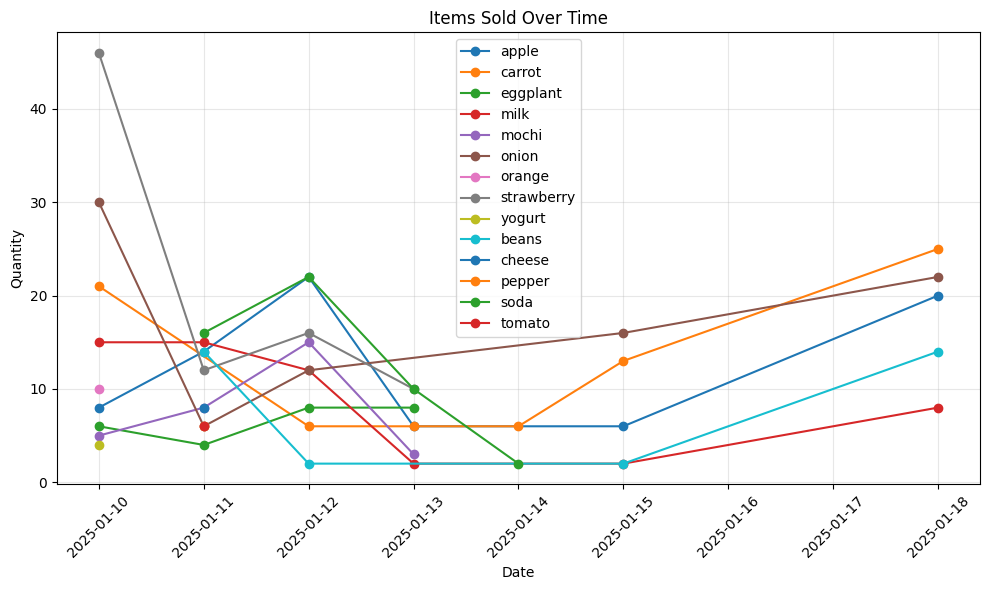

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract items from transactions
item_sales = []
for _, row in transaction_df.iterrows():
    date = row['date']
    for item, quantity in row['quantities'].items():
        item_sales.append({'date': date, 'item': item, 'quantity': quantity})

# Create and clean DataFrame
sales_df = pd.DataFrame(item_sales)
# Assuming the lists contain a single string element
sales_df['date'] = sales_df['date'].apply(lambda x: pd.Timestamp(year=x[0], month=x[1], day=x[2]))
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Sum quantities by date and item
daily_sales = sales_df.groupby(['date', 'item'])['quantity'].sum().reset_index()

# Create a single plot for all items
plt.figure(figsize=(10, 6))

# Plot each item with different colors
for item in daily_sales['item'].unique():
    data = daily_sales[daily_sales['item'] == item]
    plt.plot(data['date'], data['quantity'], marker='o', label=item)

plt.title('Items Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Based on the transaction history, calculate the total inventory at store opening (prior transaction quantities + current inventory quantities)

In [ ]:
# Write code here...
